In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [257]:
def NACA4(s):

    #definition of the NACA profile as XXXX
    NACA = s
    c = 1 #chord line

    #NACA XXXX = m p (pt)
    m = int(int(NACA)/1e3)/1e2 #maximum camber
    p = int((int(NACA)-m*1e5)/1e2)/1e1 #location of maximum camber
    pt = int((int(NACA)-m*1e5-p*1e3)) #percentage of thickness with respect to the chord


    #mean camber line definition
    if p != 0:
        x = np.append(np.linspace(0,p/100*c,126)[:-1],np.linspace(p/100*c,c,75))
        x_pc = x<(p*c) #masked array to create the piece-wise function

        yc1 = ((c*m)/(p**2))*(2*p*(x/c)-(x/c)**2)
        yc2 = ((c*m)/((1-p)**2))*((1-2*p)+2*p*(x/c)-(x/c)**2)

        yc = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                yc[i] = yc1[i]
            else:
                yc[i] = yc2[i]

        #mean camber line derivative
        dyc1dx = (2*m)/(p**2)*(p-(x/c))
        dyc2dx = (2*m)/((1-p)**2)*(p-(x/c))

        dycdx = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                dycdx[i] = dyc1dx[i]
            else:
                dycdx[i] = dyc2dx[i]

        theta = np.arctan(dycdx)

        plt.plot(x,yc1,'--k',label='yc1')
        plt.plot(x,yc2,'-.k',label='yc2')
        plt.plot(x,0.01*x_pc,':',color='grey', label='Masked matrix')
        plt.plot(x,yc,label='Mean camber')
        plt.legend()
    else:
        #symmetric airfoil camber line
        x = np.linspace(0,c,200)
        yc = np.zeros(np.shape(x))

        plt.plot(x,yc,label='Mean camber')
        plt.legend()


    #thickness
    if p != 0:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)
        xu = x - yt*np.sin(theta)
        xl = x + yt*np.sin(theta)
        yu = yc + yt*np.cos(theta)
        yl = yc - yt*np.cos(theta)


        fig, ax = plt.subplots()

        ax.set_xlim(-c*0.1,1.1*c)
        ax.axis('equal')
        ax.axis('off')
        ax.plot(xu,yu,'b')
        ax.plot(xl,yl,'b')
        ax.fill_between(x, yu, yl,facecolor='blue',alpha=0.1)
        ax.plot(x,yc,'r',linewidth=0.7)
        ax.plot([0,c],[0,0],'g',linewidth=0.6)

    else:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)

        fig, ax = plt.subplots()

        ax.set_xlim(-c*0.1,1.1*c)
        ax.axis('equal')
        ax.axis('off')
        ax.plot(x,yt,'b')
        ax.plot(x,-yt,'b')
        ax.fill_between(x, -yt, yt,facecolor='blue',alpha=0.1)
        ax.plot(x,yc,'r',linewidth=0.7)
        ax.plot([0,c],[0,0],'g',linewidth=0.6)

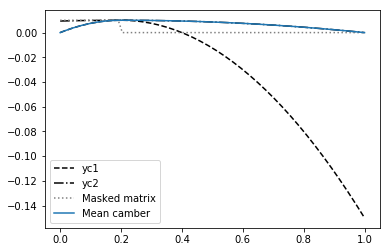

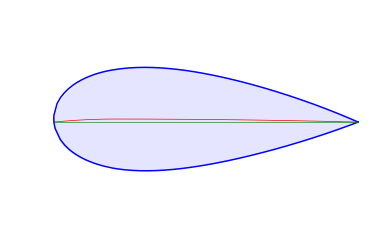

In [267]:
NACA4(1234)